# SwarmCVT test

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

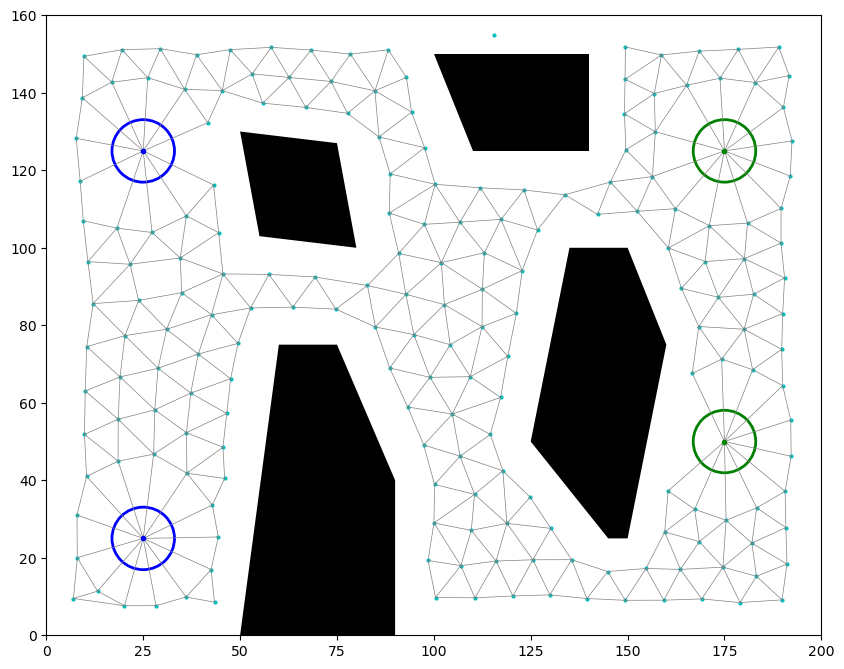

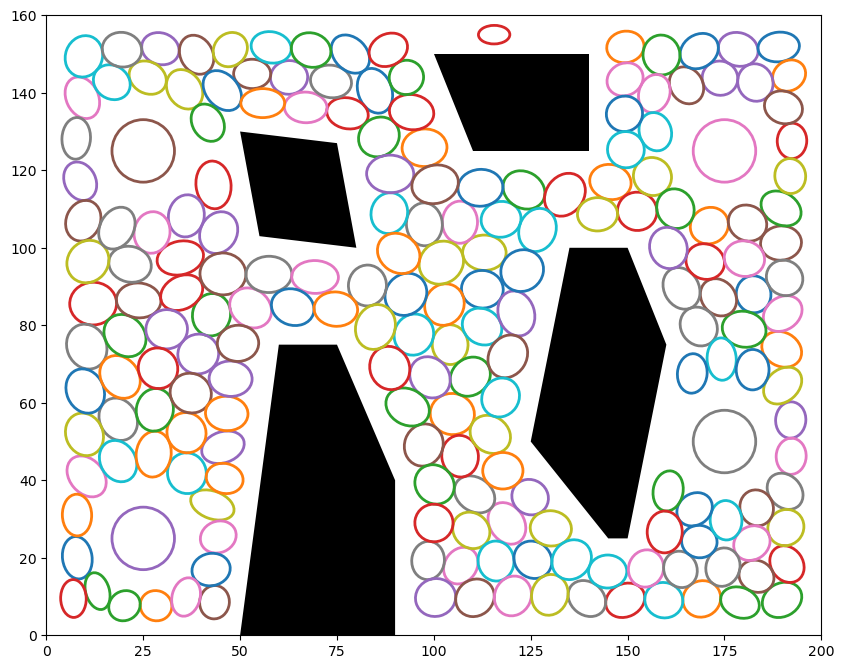

In [2]:
import pickle

from swarm_prm.solvers.utils.gaussian_prm import *
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

# Replicate of map from SwarmCVT

roadmap = Roadmap(200, 160)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(50, 0), (60, 75), (75, 75), (90, 40), (90, 0)]),
    Obstacle(None, "POLYGON", [(50, 130), (75, 127), (80, 100), (55, 103)]),
    Obstacle(None, "POLYGON", [(100, 150), (140, 150), (140, 125), (110, 125)]),
    Obstacle(None, "POLYGON", [(145, 25), (125, 50), (135, 100), (150, 100), (160, 75), (150, 25)])
]

num_samples = 200 
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
# Agent config
num_agent = 100
agent_radius = 1
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 6
TEST_CVAR = False


# Curated test instance
starts = np.array([[25, 25], [25, 125]])
goals = np.array([[175, 125], [175, 50]])

starts_weight = np.array([.5, .5])
goals_weight = np.array([.3, .7])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", 10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", 10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)
gaussian_prm.sample_free_space(sampling_strategy="CVT")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR", radius=15)
gaussian_prm.visualize_roadmap("test_map")
gaussian_prm.visualize_g_nodes("test_g_nodes")

with open("gaussian_prm.pkl", "wb") as f:
    pickle.dump(gaussian_prm, f)

In [3]:
import pickle
from swarm_prm.solvers.macro.teg import TEGGraph 

with open("gaussian_prm.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

teg_graph= TEGGraph(gaussian_prm, agent_radius, target_flow=num_agent, max_timestep=500)
max_flow, flow_dict, timestep, teg, paths, residual_graph = teg_graph.get_earliest_timestep()

Time step:  14 Max Flow:  30
Time step:  15 Max Flow:  30
Time step:  16 Max Flow:  30
Time step:  17 Max Flow:  30
Time step:  18 Max Flow:  80
Time step:  19 Max Flow:  80
Time step:  20 Max Flow:  80
Time step:  21 Max Flow:  80
Time step:  22 Max Flow:  100


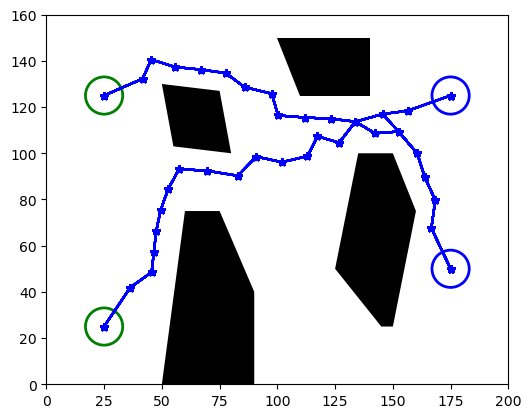

In [4]:
fig, ax = instance.visualize()
simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)
for path in simple_paths:
    x_coords = [loc[0] for loc in path]
    y_coords = [loc[1] for loc in path]
    ax.plot(x_coords, y_coords, '-*', label='Path', color='blue')